# Moduel 7.5: Practice Notebook on Module 07 Data Preprocessing and Feature Engineering

In the previous practice day (6.5), you had already chosen **one dataset** from the list below and repeated the full EDA steps you learned in Module 06. For today’s practice (7.5), you will work on the topics you learned in Module 07: Data Preprocessing and Feature Engineering.

## Dataset Options (Choose One)

1. E-Commerce Fraud Detection Dataset  
   https://www.kaggle.com/datasets/umuttuygurr/e-commerce-fraud-detection-dataset  

2. BreastDataset  
   https://www.kaggle.com/datasets/khansaafreen/breastdataset  

3. Titanic Dataset  
   https://www.kaggle.com/datasets/yasserh/titanic-dataset  

4. Loan Approval Dataset  
   https://www.kaggle.com/datasets/anishdevedward/loan-approval-dataset  

5. Diabetes Health Indicators Dataset  
   https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset  

6. Alzheimer’s Disease Dataset  
   https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset  

7. Students Performance Dataset  
   https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset  

8. Cancer Data  
   https://www.kaggle.com/datasets/erdemtaha/cancer-data  

9. Mushroom Classification  
   https://www.kaggle.com/datasets/uciml/mushroom-classification  

10. Rain in Australia  
   https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package  

---


## Section 13 — Handling Missing Values

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving transactions.csv to transactions.csv


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("transactions.csv")
df.head(10)
# TODO
# Find Missing Values of your Dataset
df.isnull().sum()
# Identify which way you should impute those missing values
# Apply the methods to impute missing values

,0
transaction_id,0
user_id,0
account_age_days,0
total_transactions_user,0
avg_amount_user,0
amount,0
country,0
bin_country,0
channel,0
merchant_category,0


## Section 14 — Encoding Categorical Variables

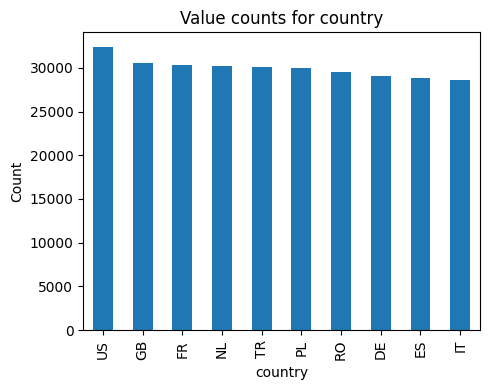

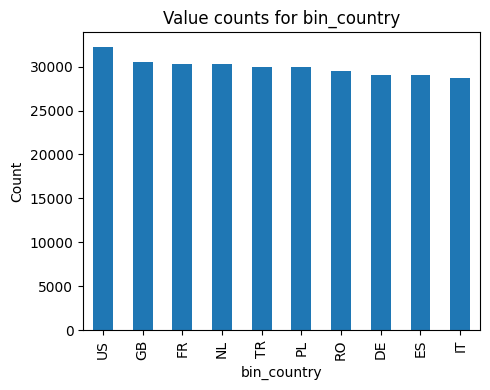

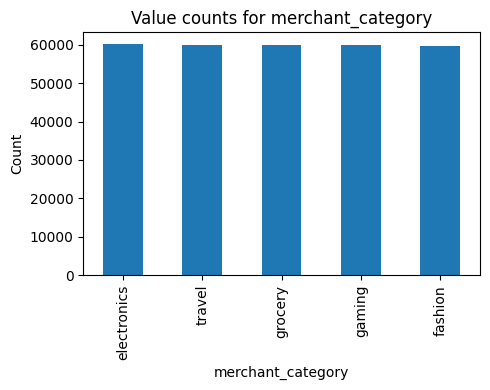

In [ ]:
# TODO
# Identify categorical features
import matplotlib.pyplot as plt
catagorical_columns = ['country','bin_country','merchant_category','transaction_time']
for c in catagorical_columns:
  plt.figure(figsize=(5,4))
  df[c].value_counts().plot(kind="bar")
  plt.title(f"Value counts for {c}")
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()
# Take decision on what encoding will you apply for each categorical features
# Apply the methods to encode the features and show final data


In [ ]:
# OneHot Encoding for nominal categorical columns

# TODO
# Identify categorical features
import pandas as pd
catagorical_columns = ['country','bin_country','merchant_category','transaction_time']

df_heart_encoded = pd.get_dummies(
    df,
    columns = catagorical_columns,
    dtype=int
)
df.head(10)

In [4]:
# Lebel encoder for binary categorical columns
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['channel'] = le.fit_transform(df['channel'])
# df
df

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299690,299691,6000,996,45,27.93,34.07,ES,ES,web,grocery,0,1,1,0,2024-09-29T04:40:54Z,218.55,0
299691,299692,6000,996,45,27.93,68.56,ES,ES,app,travel,0,1,1,1,2024-10-03T08:49:02Z,185.55,0
299692,299693,6000,996,45,27.93,25.02,ES,ES,app,fashion,0,1,1,1,2024-10-26T07:40:38Z,33.50,0
299693,299694,6000,996,45,27.93,23.92,ES,ES,web,gaming,0,0,0,0,2024-10-27T09:31:56Z,71.75,0


## Section 15 — Normalization and Scaling

In [3]:
# TODO
# Check if your dataset have features with different range of values or not
# Take decision on whether scaling is required or not
# If required apply one of the scaling method


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

target_col = 'is_fraud'

X = df.drop(columns=[target_col])
y = df[target_col]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

scaler_sd = StandardScaler()
X_train_std = scaler_sd.fit_transform(X_train)
X_test_std = scaler_sd.transform(X_test)

# min max scaling
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)


print("\n--- Displaying Standard Scaled Data ---")
# Convert scaled arrays back to DataFrame for better visualization with column names
X_train_std_df = pd.DataFrame(X_train_std, columns = X_train.columns, index = X_train.index)
X_test_std_df = pd.DataFrame(X_test_std, columns = X_test.columns, index = X_test.index)
print("\nFirst 5 rows of X_train & X_test (Standard Scaled):")
display(X_train_std_df.head())
display(X_test_std_df.head())


print("\n--- Displaying Standard Scaled Data ---")
# Convert scaled arrays back to DataFrame for better visualization with column names
X_train_mm_df = pd.DataFrame(X_train_mm, columns = X_train.columns, index = X_train.index)
X_test_mm_df = pd.DataFrame(X_test_mm, columns = X_test.columns, index = X_test.index)

print("\nFirst 5 rows of X_train (Minmax Scaled):")
display(X_train_mm_df.head())
display(X_test_mm_df.head())



ValueError: could not convert string to float: 'NL'